In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("dating.csv")
data_male = data[data['gender'] == 0]
data_female = data[data['gender'] == 1]

In [27]:
data_male['attractive_important'].describe()

count    3309.000000
mean        0.179631
std         0.093674
min         0.000000
25%         0.140000
50%         0.153800
75%         0.200000
max         0.900000
Name: attractive_important, dtype: float64

In [26]:
data_female['attractive_important'].describe()

count    3435.000000
mean        0.261172
std         0.124348
min         0.066693
25%         0.190481
50%         0.222222
75%         0.300000
max         1.000000
Name: attractive_important, dtype: float64

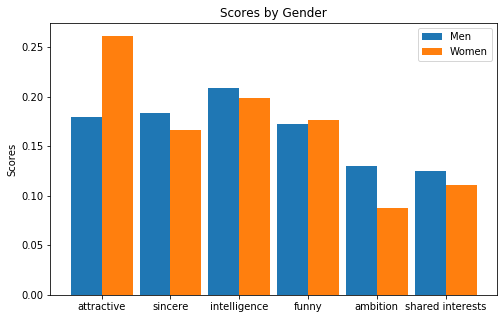

In [22]:
male_means = [data_male['attractive_important'].mean(),
data_male['sincere_important'].mean(),
data_male['intelligence_important'].mean(),
data_male['funny_important'].mean(),
data_male['ambition_important'].mean(),
data_male['shared_interests_important'].mean()]

female_means = [data_female['attractive_important'].mean(),
data_female['sincere_important'].mean(),
data_female['intelligence_important'].mean(),
data_female['funny_important'].mean(),
data_female['ambition_important'].mean(),
data_female['shared_interests_important'].mean()]

labels = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'shared interests']
x = np.arange(len(labels))
width = 0.45

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, male_means, width, label='Men')
rects2 = ax.bar(x + width/2, female_means, width, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [70]:
success_count = data[data['decision'] == 1]['attractive_important'].value_counts()
value_count = data['attractive_important'].value_counts()


0.200000    1333
0.150000     721
0.250000     628
0.100000     617
0.300000     573
0.500000     251
0.400000     247
0.350000     161
0.160000     116
0.140000      92
0.170000      77
0.180000      72
0.190000      64
0.153800      60
0.166667      58
0.120000      57
0.220000      55
0.177782      47
0.050000      44
0.153815      40
0.230000      38
0.240000      35
0.750000      33
0.166700      32
0.150900      32
0.155584      30
0.600000      30
0.333333      28
0.700000      24
0.222222      23
            ... 
0.450000      11
0.090909      10
1.000000      10
0.122388      10
0.160684      10
0.195680      10
0.209279      10
0.204541      10
0.130400      10
0.191481      10
0.095190       9
0.150915       9
0.900000       9
0.085100       9
0.207921       8
0.210000       8
0.159132       8
0.176465       8
0.135135       7
0.083308       6
0.181818       6
0.127700       5
0.194419       5
0.173900       4
0.208300       4
0.199980       3
0.090000       3
0.155600      